In [125]:
import pandas as pd
from matplotlib.cm import ScalarMappable
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [5]:
true_vals_df = pd.read_csv('true_vals.csv')
bert_result_df = pd.read_csv('bert_sep_3_1e-5_epoch_200_predicted_vals.csv')
roberta_result_df = pd.read_csv('roberta_sep_32_2e-5_epoch_200_predicted_vals.csv')
cwbert_result_df = pd.read_csv('cwbert_epoch_200_predicted_vals.csv')
doc2vec_result_df = pd.read_csv('epoch_7000_predicted_vals.csv')
true_vals = list(true_vals_df['0'])
bert_result = list(bert_result_df['0'])
roberta_result = list(roberta_result_df['0'])
cwbert_result = list(cwbert_result_df['0'])
doc2vec_result = list(doc2vec_result_df['0'])

In [32]:
print(true_vals)

[3.3499999046325684, 5.849999904632568, 3.799999952316284, 3.549999952316284, 5.75, 3.799999952316284, 5.400000095367432, 3.849999904632568, 5.0, 4.099999904632568, 2.0, 4.349999904632568, 3.3499999046325684, 2.8499999046325684, 4.900000095367432, 4.199999809265137, 3.049999952316284, 3.849999904632568, 4.75, 3.799999952316284, 3.700000047683716, 4.25, 2.3499999046325684, 5.099999904632568, 3.299999952316284, 4.349999904632568, 4.300000190734863, 5.300000190734863, 5.900000095367432, 5.400000095367432, 2.950000047683716, 2.0, 3.25, 4.449999809265137, 3.700000047683716, 4.449999809265137, 3.700000047683716, 5.050000190734863, 2.700000047683716, 6.150000095367432, 4.150000095367432, 2.0999999046325684, 4.199999809265137, 4.449999809265137, 3.5999999046325684, 5.0, 5.449999809265137, 4.25, 5.550000190734863, 5.849999904632568, 6.050000190734863, 5.099999904632568, 5.349999904632568, 4.349999904632568, 3.299999952316284, 3.900000095367432, 6.150000095367432, 5.199999809265137, 5.5999999046

In [33]:
print(bert_result)

[5.1105943, 5.460523, 4.737376, 4.633655, 4.7017508, 4.6331067, 4.586859, 4.590859, 5.03736, 4.4578576, 4.1557155, 4.2687993, 4.5361795, 4.793145, 4.5954432, 4.8954153, 4.482537, 4.437657, 4.299408, 4.694804, 4.425661, 4.7569914, 4.6997824, 4.3502755, 4.310936, 4.1764226, 4.294272, 4.300433, 4.578199, 4.325065, 4.2179055, 4.292654, 4.300476, 4.8345737, 4.3442664, 4.381939, 4.7935653, 4.279889, 4.223293, 4.602777, 4.455355, 4.255908, 4.391873, 4.650676, 4.773479, 4.3408003, 4.8472676, 4.5051427, 4.2884316, 4.9468274, 4.5079775, 4.5960326, 4.285484, 4.6867847, 4.2713223, 4.897131, 4.428845, 4.587707, 4.7876234, 4.3540664, 4.274108, 4.381366, 4.4689364, 4.747382, 4.4116936, 4.3824124, 4.418245, 4.876871, 4.3337517, 4.6287985, 4.1094756, 4.000366, 3.9083626, 4.8732142, 4.235293, 4.529748, 4.427127, 4.432798, 3.9354818, 4.2607617, 4.4063697, 4.419253, 4.5747485, 3.9528239, 3.9428785, 4.606726, 4.5975614, 4.417526, 4.178608, 4.773371, 4.482577, 4.8167076, 5.0504427, 4.499249, 4.240703, 4.413

In [67]:
def scatter_plot(x, y, xlabel, ylabel, line=True):

    fig, ax = plt.subplots(figsize=(10,10))

    # divider = make_axes_locatable(ax)
    # cax = divider.append_axes('right', size='5%', pad=0.05)

    # fig = plt.figure(figsize=(12,10))
    plt.xlim(min(x), max(x)+1)
    plt.ylim(min(y), max(y)+1)
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)

    plt.xlabel(xlabel, fontsize=32)
    plt.ylabel(ylabel, fontsize=32)

    ax.scatter(x, y, color='blue')
    ax.tick_params(axis='both', which='major', labelsize=32)
    plt.xticks(fontsize=32)
    plt.yticks(fontsize=32)
    
    
    if line:
        lims = [
            np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
            np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
        ]

        # now plot both limits against eachother
        ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
        ax.set_aspect('equal')
        ax.set_xlim(lims)
        ax.set_ylim(lims)
    
    plt.show()
    # filename = "tsne_log.eps"
    # plt.savefig(f"../tsne/eps/{filename}", bbox_inches='tight', format='eps')

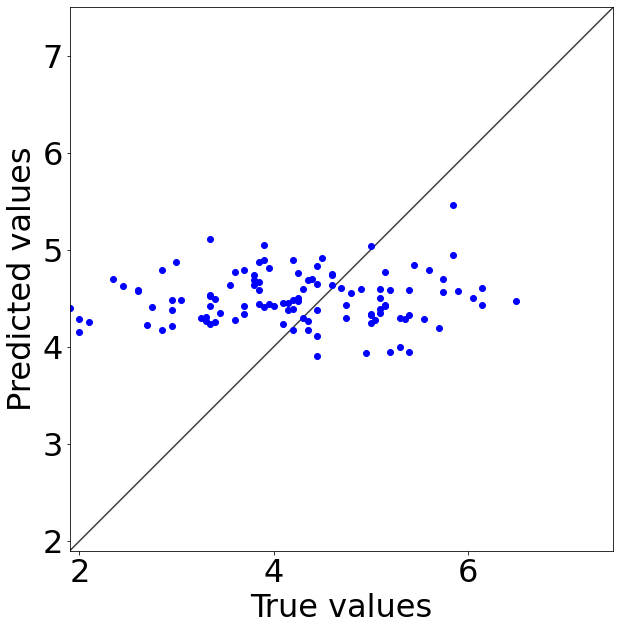

In [69]:
scatter_plot(true_vals, bert_result, 'True values', 'Predicted values')

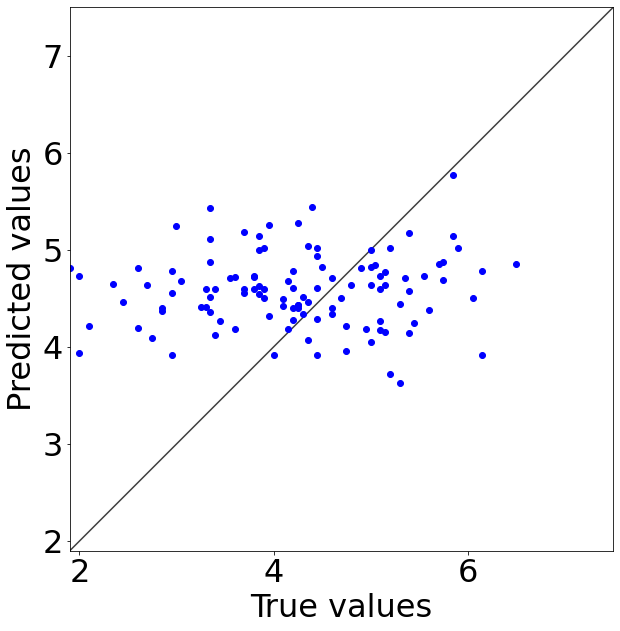

In [28]:
scatter_plot(true_vals, roberta_result, 'True values', 'Predicted values')

In [145]:
def boxplot(result_list, title, xlabel, ylabel, xlist, xticks_fontsize, yticks_fontsize, median_color='#ff7f0e', log_scale=False):
    if median_color == 'black':
        title = title + '_median_black'
    
    if not log_scale:
        title += '_linear'
    
        
    filename = title + '.eps'
    
    plt.rcParams['figure.figsize'] = [30, 20]

    plt.boxplot(result_list, showfliers=True, boxprops= dict(linewidth=10, color='black'),
               whiskerprops=dict(linestyle='-',linewidth=10, color='black'),
               capprops=dict(linewidth=10), medianprops=dict(linewidth=10, color=median_color))
    
    # plt.xticks([1, 2, 3, 4, 5, 6], xlabel, fontsize=20)
    plt.xticks(xlist, xlabel, fontsize=xticks_fontsize)
    plt.yticks(fontsize=yticks_fontsize)
    # plt.ylabel(ylabel, fontsize=40)
    
    if log_scale:
        plt.yscale('log')
    # plt.title(title, fontsize=30)
    
    # plt.savefig(f"../figure/eps/{filename}", format='eps', bbox_inches='tight')
    
    # plt.show()

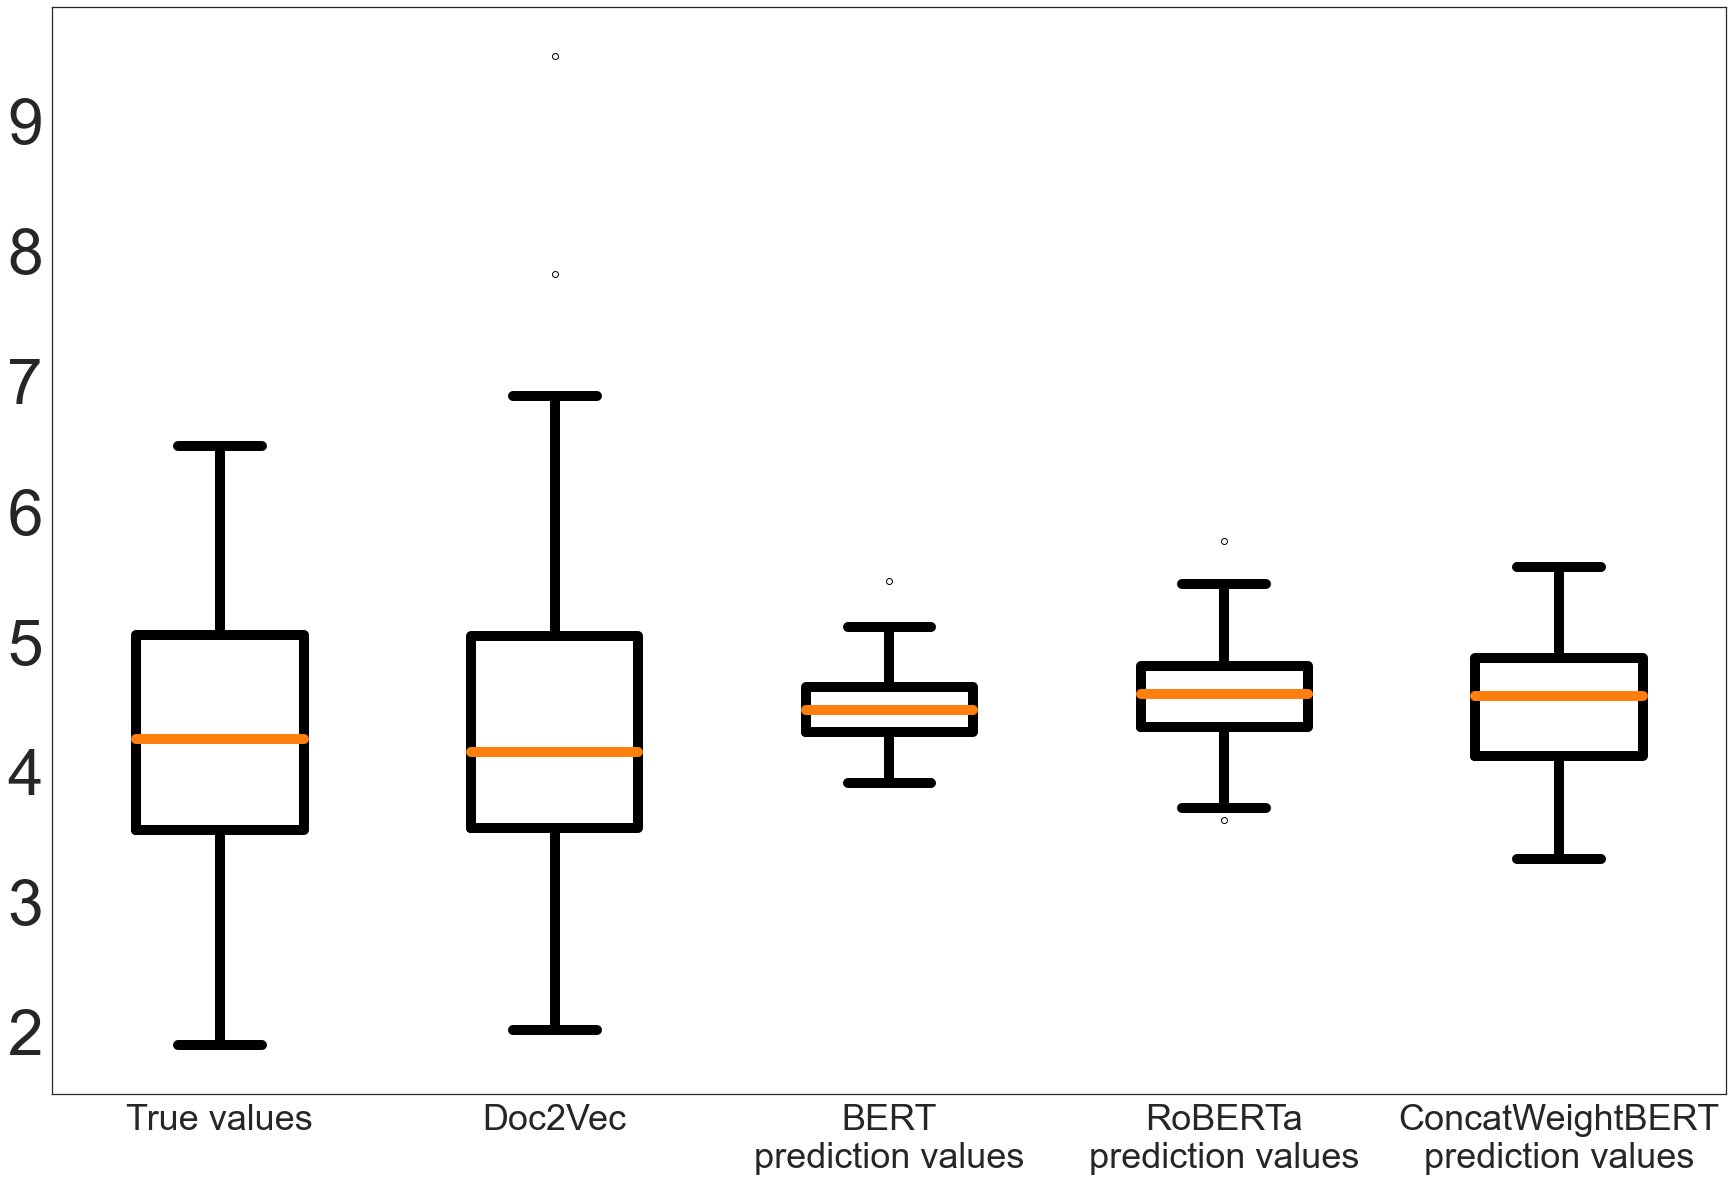

In [160]:
result_list = [true_vals, doc2vec_result, bert_result, roberta_result, cwbert_result]
xlabel = [f"True values", f"Doc2Vec", f"BERT\nprediction values", f"RoBERTa\nprediction values", f"ConcatWeightBERT\nprediction values"]
boxplot(result_list, '', xlabel, '', [1, 2, 3, 4, 5], 36, 64)

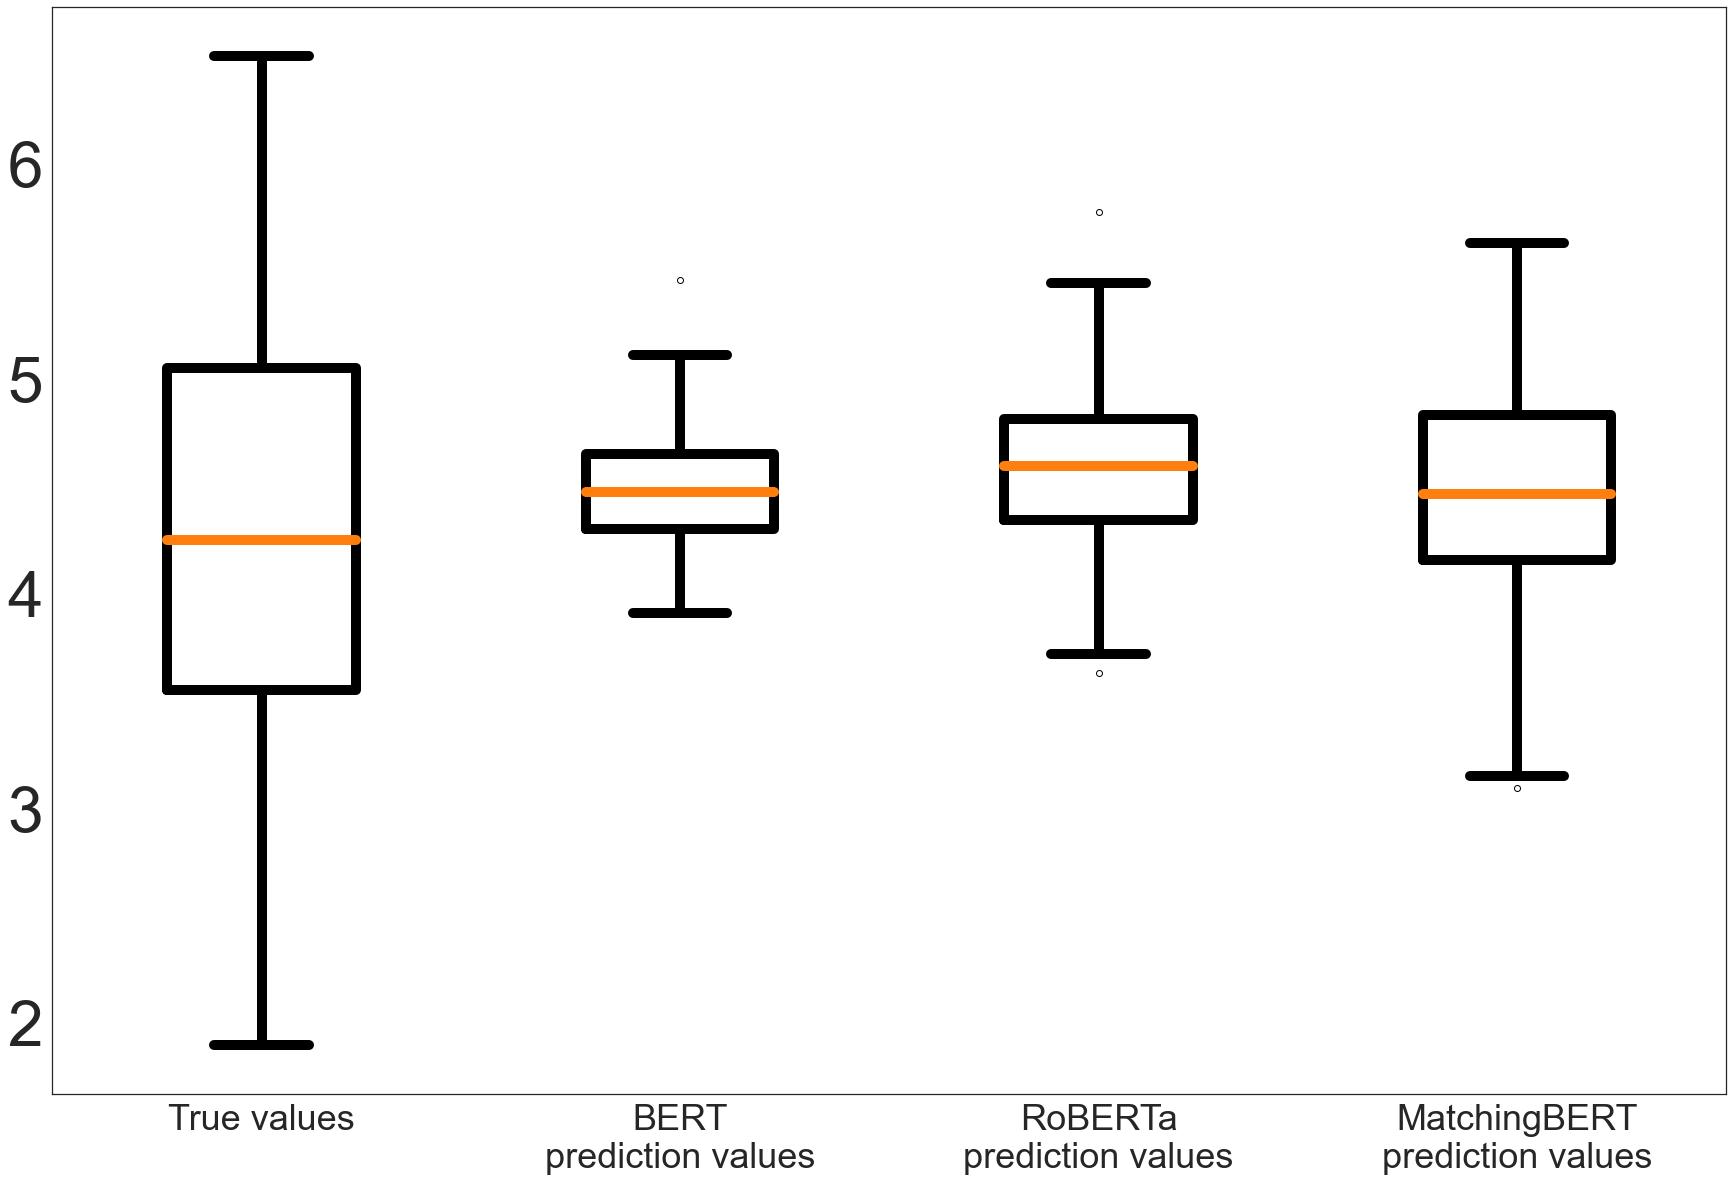

In [148]:
matchingbert_result_df = pd.read_csv('epoch_187_predicted_vals.csv')
matchingbert_result = list(matchingbert_result_df['0'])

result_list = [true_vals, bert_result, roberta_result, matchingbert_result]
xlabel = [f"True values", f"BERT\nprediction values", f"RoBERTa\nprediction values", f"MatchingBERT\nprediction values"]
boxplot(result_list, '', xlabel, '', [1, 2, 3, 4], 36, 64)

In [116]:
def get_x_y_for_tsne(filename):
    df = pd.read_csv(filename)
    df.drop(columns = df.columns[0], axis=1, inplace=True)
    
    data = np.array(df)
    tsne = TSNE(random_state = 42)
    data_tsne = tsne.fit_transform(data)
    x_for_tsne = []
    y_for_tsne = []

    for xy in data_tsne:
        x_for_tsne.append(xy[0])
        y_for_tsne.append(xy[1])
        
    return x_for_tsne, y_for_tsne

In [117]:
x_for_tsne, y_for_tsne = get_x_y_for_tsne('../predicting-satisfaction-using-graphs/csv/epoch_9_embeddings.csv')

In [118]:
splitbert_df = pd.read_csv('../predicting-satisfaction-using-graphs/csv/epoch_9_result_for_tsne.csv')
preds = list(splitbert_df['prediction'])
labels = list(splitbert_df['label'])
scores = list(splitbert_df['score'])
indexes = list(splitbert_df['index'])

o_or_x = []
for pred, label in zip(preds, labels):
    if pred == label:
        o_or_x.append(1)
    else:
        o_or_x.append(0)

In [119]:
def t_sne_for_regression(x, y, score, true_vals, xlabel, ylabel):
    size = list(map(lambda x:x*70, score))
    
    minsize = min(size)
    maxsize = max(size)

    tsne_df = pd.DataFrame({'x': x, 'y': y, 'color': true_vals, 'size': size})

    fig, ax = plt.subplots()

    # set before set_style
    sns.set(rc={'figure.figsize':(16,13)})
    sns.set_style("white")

    ax = sns.scatterplot(x = 'x', y = 'y', hue="color", size = "size", data=tsne_df, palette='cool', 
                        sizes=(minsize, maxsize), alpha=0.65, edgecolor="black", linewidth=1, legend = False)
    
    for i, s in enumerate(score):
        ax.annotate(round(s, 2), (x[i], y[i]+0.35), fontsize=10)
        
    for i, s in enumerate(true_vals):
        ax.annotate(f'{i}, {round(s, 2)}', (x[i], y[i]+0.15), fontsize=10, color='r')

    ax.set(xlabel=None, ylabel=None)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)

    sm = plt.cm.ScalarMappable(cmap=plt.cm.cool, 
                            norm=plt.Normalize(vmin=min(score), vmax=max(score)))

    cbar = fig.colorbar(sm)

In [121]:
def t_sne_for_classification(x, y, preds, labels, scores, indexes, oxs, xlabel, ylabel):
    size = list(map(lambda x:x*70, scores))
    
    minsize = min(size)
    maxsize = max(size)

    tsne_df = pd.DataFrame({'x': x, 'y': y, 'color': scores, 'size': size})

    fig, ax = plt.subplots()

    # set before set_style
    sns.set(rc={'figure.figsize':(16,13)})
    sns.set_style("white")

    ax = sns.scatterplot(x = 'x', y = 'y', hue="color", size = "size", data=tsne_df, palette='cool', 
                        sizes=(minsize, maxsize), alpha=0.65, edgecolor="black", linewidth=1, legend = False)
    
    # preds
    for i, p in enumerate(preds):
        ax.annotate(p, (x[i], y[i]+0.05), fontsize=10)
        
    # answers
    for i, ls in enumerate(zip(labels, indexes)):
        ax.annotate(f'{ls[0]}, {ls[1]}', (x[i], y[i]+0.1), fontsize=10, color='r')

    ax.set(xlabel=None, ylabel=None)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)

    sm = plt.cm.ScalarMappable(cmap=plt.cm.cool, 
                            norm=plt.Normalize(vmin=min(scores), vmax=max(scores)))

    cbar = fig.colorbar(sm)

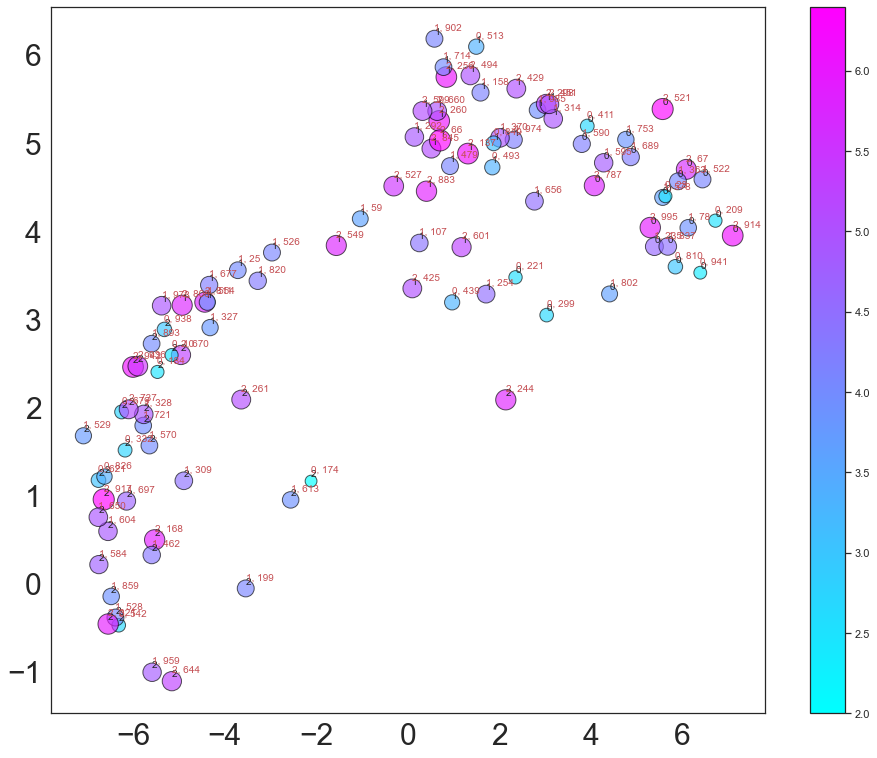

In [123]:
t_sne_for_classification(x_for_tsne, y_for_tsne, preds, labels, scores, indexes, o_or_x, 'x', 'y')

In [106]:
# 0 <= score < 3.5: 0
# 3.5 <= score < 5: 1
# 5 <= score: 2

for i in range(len(o_or_x)):
    if o_or_x[i]:
        answer = 'o'
    else:
        answer = 'x'
    print(f'o_or_x: {answer}, prediction: {preds[i]}, true label: {labels[i]}, true score: {scores[i]}')

o_or_x: o, prediction: 0, true label: 0, true score: 2.7
o_or_x: x, prediction: 1, true label: 0, true score: 3.05
o_or_x: o, prediction: 1, true label: 1, true score: 3.95
o_or_x: o, prediction: 2, true label: 2, true score: 6.15
o_or_x: o, prediction: 2, true label: 2, true score: 6.4
o_or_x: o, prediction: 1, true label: 1, true score: 4.0
o_or_x: x, prediction: 1, true label: 2, true score: 5.75
o_or_x: x, prediction: 2, true label: 0, true score: 2.65
o_or_x: x, prediction: 0, true label: 1, true score: 3.95
o_or_x: x, prediction: 1, true label: 0, true score: 3.0
o_or_x: x, prediction: 0, true label: 2, true score: 5.35
o_or_x: o, prediction: 2, true label: 2, true score: 6.35
o_or_x: x, prediction: 2, true label: 1, true score: 3.9
o_or_x: x, prediction: 1, true label: 2, true score: 5.05
o_or_x: x, prediction: 0, true label: 1, true score: 4.4
o_or_x: x, prediction: 0, true label: 2, true score: 6.1
o_or_x: x, prediction: 2, true label: 1, true score: 4.9
o_or_x: x, prediction:

In [113]:
# 0 <= score < 3.5: 0
# 3.5 <= score < 5: 1
# 5 <= score: 2

for i in range(len(o_or_x)):
    if scores[i] >= 6:
        if o_or_x[i]:
            answer = 'o'
        else:
            answer = 'x'
        print(f'o_or_x: {answer}, prediction: {preds[i]}, true label: {labels[i]}, true score: {scores[i]}')

o_or_x: o, prediction: 2, true label: 2, true score: 6.15
o_or_x: o, prediction: 2, true label: 2, true score: 6.4
o_or_x: o, prediction: 2, true label: 2, true score: 6.35
o_or_x: x, prediction: 0, true label: 2, true score: 6.1
o_or_x: x, prediction: 0, true label: 2, true score: 6.4
o_or_x: x, prediction: 0, true label: 2, true score: 6.15
o_or_x: x, prediction: 0, true label: 2, true score: 6.1
o_or_x: o, prediction: 2, true label: 2, true score: 6.15


In [115]:
# 0 <= score < 3.5: 0
# 3.5 <= score < 5: 1
# 5 <= score: 2

for i in range(len(o_or_x)):
    if scores[i] <= 2.5:
        if o_or_x[i]:
            answer = 'o'
        else:
            answer = 'x'
        print(f'o_or_x: {answer}, prediction: {preds[i]}, true label: {labels[i]}, true score: {scores[i]}')

o_or_x: x, prediction: 2, true label: 0, true score: 2.35
o_or_x: o, prediction: 0, true label: 0, true score: 2.5
o_or_x: x, prediction: 1, true label: 0, true score: 2.45
o_or_x: x, prediction: 2, true label: 0, true score: 2.0
o_or_x: o, prediction: 0, true label: 0, true score: 2.45
o_or_x: o, prediction: 0, true label: 0, true score: 2.45


In [1]:
def normalization(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [17]:
def draw_multiple_cdf_normalize_y(np_result_list, title, colors, xlabel, legends, linestyles, log_scale, only_integer=False):
    if log_scale:
        title = title + '_log_scale'
    filename = title + '.eps'
    
    fig = plt.figure(figsize=(15,10))
    fig.set_facecolor('white')
    ax = fig.add_subplot()
    
    for np_result, color, legend, linestyle in zip(np_result_list, colors, legends, linestyles):
        sorted_data = np.sort(np_result)
        print(sorted_data)
        if legend == 'no legend':
            plt.step(sorted_data, normalization(np.arange(sorted_data.size)), color=color, linestyle=linestyle, linewidth=7)
        else:
            plt.step(sorted_data, normalization(np.arange(sorted_data.size)), label=legend, color=color, linestyle=linestyle, linewidth=7)
        if log_scale:
            plt.xscale('symlog')
            
        ax.spines['right'].set_color('black')
        ax.spines['top'].set_color('black')
        ax.spines['left'].set_color('black')
        ax.spines['bottom'].set_color('black')
        
        if only_integer:
            ax.xaxis.set_major_locator(MaxNLocator(integer=True))
  
    if legend != 'no legend':
        plt.legend(prop={'size': 48 }, loc = 'lower right', framealpha=1, edgecolor='0')

    plt.xticks(fontsize=36)
    plt.yticks(fontsize=36)
    
    plt.savefig(f"../predicting-satisfaction-using-graphs/figure/{filename}", bbox_inches='tight', format='eps')
    plt.show()

In [18]:
colors = ['#ef8a62']
legends = ['no legend']
linestyles = ['-']

[1.89999998 2.         2.         2.0999999  2.3499999  2.45000005
 2.5999999  2.5999999  2.70000005 2.75       2.8499999  2.8499999
 2.95000005 2.95000005 2.95000005 3.         3.04999995 3.25
 3.29999995 3.29999995 3.3499999  3.3499999  3.3499999  3.3499999
 3.3499999  3.4000001  3.4000001  3.45000005 3.54999995 3.5999999
 3.5999999  3.70000005 3.70000005 3.70000005 3.79999995 3.79999995
 3.79999995 3.8499999  3.8499999  3.8499999  3.8499999  3.9000001
 3.9000001  3.9000001  3.95000005 3.95000005 4.         4.0999999
 4.0999999  4.1500001  4.1500001  4.19999981 4.19999981 4.19999981
 4.19999981 4.25       4.25       4.25       4.25       4.30000019
 4.30000019 4.3499999  4.3499999  4.3499999  4.4000001  4.44999981
 4.44999981 4.44999981 4.44999981 4.44999981 4.5        4.5999999
 4.5999999  4.5999999  4.69999981 4.75       4.75       4.80000019
 4.9000001  4.94999981 5.         5.         5.         5.
 5.05000019 5.0999999  5.0999999  5.0999999  5.0999999  5.1500001
 5.1500001  5.15

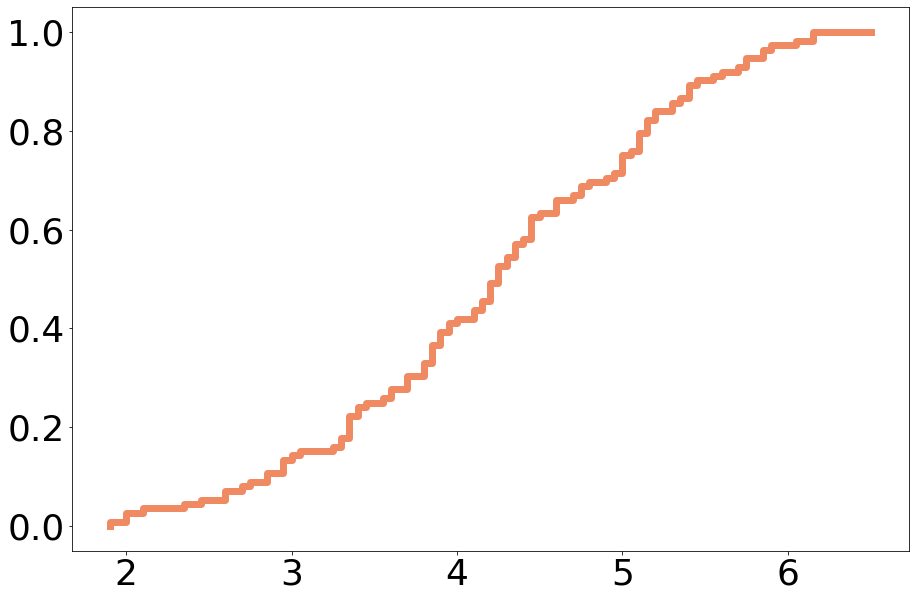

In [19]:
draw_multiple_cdf_normalize_y([true_vals], "satisfaction_score", colors, 'Satisfaction', legends, linestyles, False)

In [20]:
post_df = pd.read_csv('../predicting-satisfaction-using-graphs/csv/dataset/liwc_post.csv', encoding='UTF-8')
comment_df = pd.read_csv('../predicting-satisfaction-using-graphs/csv/dataset/liwc_comment.csv', encoding='UTF-8')

In [23]:
post_df

,Unnamed: 0,content,satisfaction,satisfy1,satisfy2,satisfy3,satisfy4,Segment,WC,Analytic,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,0,Third year college student. My depression has ...,3.15,3.0,3.2,3.4,3.0,1,197,63.16,...,5.58,0.00,0.51,0.51,0.0,0.0,3.05,2.54,1.02,0.0
1,1,"I don't really know why, and maybe it's just m...",4.25,4.6,3.8,3.6,5.0,2,75,8.69,...,5.33,0.00,0.00,1.33,0.0,0.0,2.67,5.33,0.00,0.0
2,2,I am 30 years old and my girlfriend is 24 are ...,5.35,6.0,5.4,5.2,4.8,3,164,4.64,...,6.10,1.22,0.00,1.22,0.0,0.0,1.22,2.44,0.00,0.0
3,3,"Almost every day for months, I've gone to a se...",3.30,2.8,2.8,3.6,4.0,4,80,78.30,...,7.50,0.00,0.00,0.00,0.0,0.0,2.50,6.25,0.00,2.5
4,4,Can you love when you're depressed? When depre...,3.80,3.4,3.4,4.0,4.4,5,53,14.36,...,3.77,0.00,0.00,3.77,0.0,0.0,3.77,5.66,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,Well yeah title says it all. The other night I...,5.95,6.4,5.4,6.0,6.0,996,96,41.50,...,6.25,0.00,0.00,1.04,0.0,0.0,2.08,3.12,0.00,0.0
996,996,"Yeah, how great, how lucky I am. When I finall...",4.30,4.2,4.2,4.4,4.4,997,72,5.73,...,4.17,0.00,0.00,0.00,0.0,0.0,2.78,4.17,0.00,0.0
997,997,"I've felt reluctant to post here, given that o...",4.30,4.4,4.0,4.4,4.4,998,98,54.45,...,6.12,1.02,0.00,0.00,0.0,0.0,2.04,4.08,0.00,0.0
998,998,Iâm a 32 year old man. I have been extremely...,4.25,4.6,3.2,4.0,5.2,999,158,50.18,...,3.80,0.00,0.00,1.90,0.0,0.0,1.27,0.00,0.00,0.0


In [24]:
list_satisfaction = list(post_df['satisfaction'])
list_tag = list(post_df['Segment'])
list_post = list(post_df['content'])
list_comment = list(comment_df['content'])

In [28]:
list_score_tag = []

for s, t in zip(list_satisfaction, list_tag):
    list_score_tag.append([s, t])

In [31]:
print(list_score_tag[999])

[5.85, 1000]


[1.4  1.4  1.4  1.75 1.8  1.85 1.9  1.9  2.   2.   2.   2.   2.05 2.1
 2.1  2.1  2.1  2.15 2.15 2.2  2.2  2.2  2.2  2.25 2.25 2.25 2.25 2.25
 2.3  2.35 2.35 2.35 2.4  2.45 2.45 2.45 2.45 2.45 2.45 2.45 2.45 2.5
 2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.55 2.6  2.6  2.6  2.6
 2.6  2.65 2.65 2.65 2.65 2.65 2.65 2.65 2.65 2.65 2.65 2.7  2.7  2.7
 2.7  2.7  2.7  2.7  2.75 2.75 2.75 2.75 2.75 2.75 2.75 2.75 2.8  2.8
 2.8  2.8  2.8  2.85 2.85 2.85 2.85 2.85 2.85 2.85 2.85 2.9  2.9  2.9
 2.9  2.9  2.9  2.9  2.9  2.95 2.95 2.95 2.95 2.95 2.95 2.95 2.95 2.95
 2.95 2.95 2.95 2.95 3.   3.   3.   3.   3.   3.   3.   3.   3.   3.
 3.   3.   3.05 3.05 3.05 3.05 3.05 3.05 3.1  3.1  3.1  3.1  3.1  3.1
 3.1  3.1  3.1  3.15 3.15 3.15 3.15 3.15 3.15 3.15 3.15 3.15 3.15 3.15
 3.2  3.2  3.2  3.2  3.2  3.25 3.25 3.25 3.25 3.25 3.25 3.3  3.3  3.3
 3.3  3.3  3.3  3.3  3.3  3.3  3.35 3.35 3.35 3.35 3.35 3.35 3.35 3.35
 3.35 3.35 3.35 3.35 3.35 3.35 3.35 3.35 3.35 3.35 3.4  3.4  3.4  3.4
 3.4  3.4  3.4  3

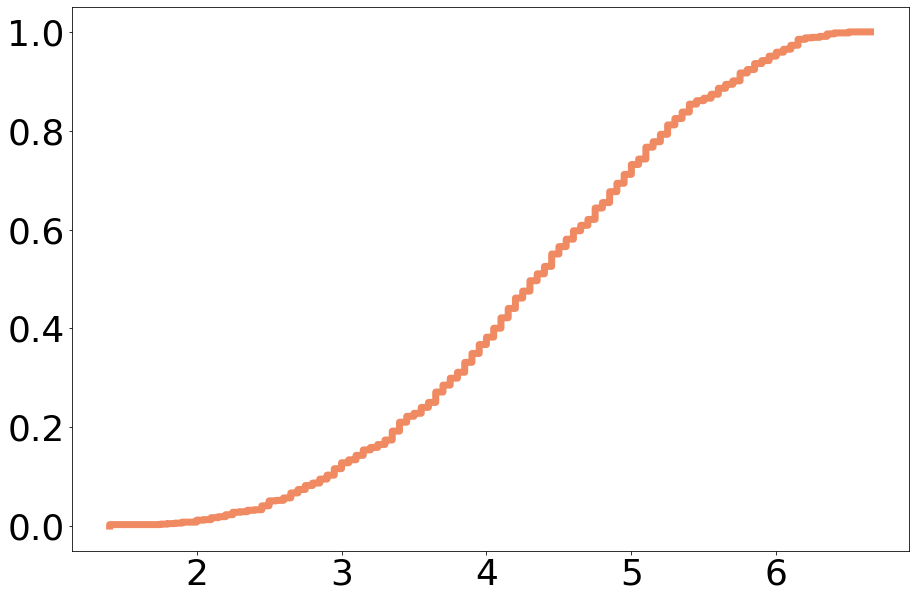

In [32]:
draw_multiple_cdf_normalize_y([list_satisfaction], "satisfaction_score", colors, 'Satisfaction', legends, linestyles, False)

In [127]:
satisfaction_comb = list(itertools.combinations(post_df['satisfaction'], 2))


def get_subtraction_from_tuple(t):
    num1 = max(t)
    num2 = min(t)

    return num1 - num2


comb_sub = []
for comb in satisfaction_comb:
    comb_sub.append(get_subtraction_from_tuple(comb))

In [130]:
len(comb_sub)

499500

In [128]:
colors = ['#ef8a62']
legends = ['no legend']
linestyles = ['-']

[0.   0.   0.   ... 5.25 5.25 5.25]


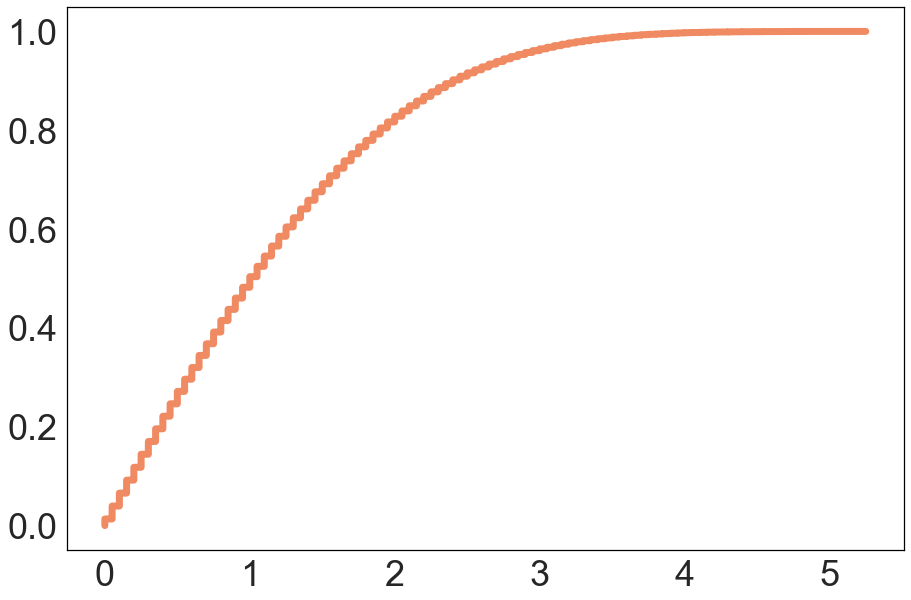

In [129]:
draw_multiple_cdf_normalize_y([comb_sub], "satisfaction_difference", colors, 'Satisfaction Difference', legends, linestyles, False)

In [364]:
list_sentiment = list(post_df['satisfy3'])

[1.  1.6 1.8 2.  2.  2.  2.  2.  2.  2.2 2.2 2.2 2.2 2.2 2.4 2.4 2.4 2.4
 2.4 2.4 2.4 2.4 2.4 2.4 2.6 2.6 2.6 2.6 2.6 2.6 2.6 2.6 2.6 2.6 2.6 2.6
 2.6 2.6 2.6 2.8 2.8 2.8 2.8 2.8 2.8 2.8 2.8 2.8 2.8 2.8 2.8 2.8 2.8 2.8
 2.8 2.8 2.8 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
 3.  3.  3.2 3.2 3.2 3.2 3.2 3.2 3.2 3.2 3.2 3.2 3.2 3.2 3.2 3.2 3.2 3.2
 3.2 3.2 3.2 3.2 3.2 3.2 3.2 3.2 3.2 3.2 3.2 3.2 3.2 3.2 3.2 3.2 3.2 3.2
 3.2 3.2 3.4 3.4 3.4 3.4 3.4 3.4 3.4 3.4 3.4 3.4 3.4 3.4 3.4 3.4 3.4 3.4
 3.4 3.4 3.4 3.4 3.4 3.4 3.4 3.4 3.4 3.4 3.4 3.4 3.4 3.4 3.4 3.4 3.4 3.4
 3.4 3.4 3.4 3.4 3.4 3.4 3.4 3.4 3.4 3.4 3.4 3.4 3.4 3.4 3.4 3.6 3.6 3.6
 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6
 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6
 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6
 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 

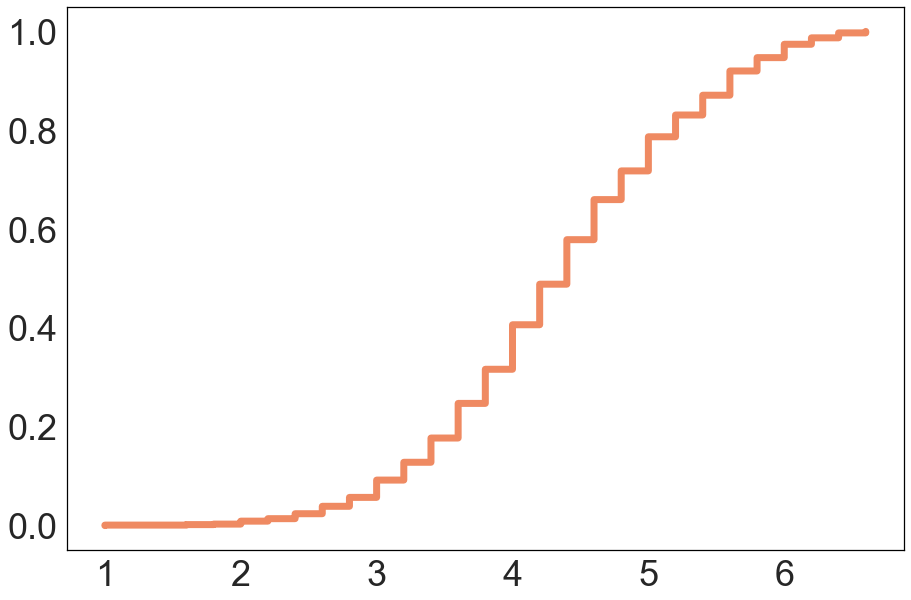

In [365]:
draw_multiple_cdf_normalize_y([list_sentiment], "satisfaction_score", colors, 'Satisfaction', legends, linestyles, False)

In [370]:
count1 = sum(map(lambda x : x < 4, list_sentiment))
count2 = sum(map(lambda x : x >= 4 and x < 4.8, list_sentiment))
count3 = sum(map(lambda x : x >= 4.8, list_sentiment))
print(count1, count2, count3)

316 343 341


# Heatmap

In [347]:
pred_true_df = pd.read_csv('../predicting-satisfaction-using-graphs/csv/dataset/contrastive_epoch_10_result.csv', encoding='UTF-8', index_col=0)

In [156]:
pred_true_df

,prediction,label
0,1.105569,2.00
1,-0.024796,2.95
2,1.320138,1.40
3,1.418432,0.20
4,-0.143522,-0.20
...,...,...
5990,-1.857362,-1.50
5991,-2.653759,-0.70
5992,0.453018,0.95
5993,-0.343379,1.75


In [213]:
def draw_pred_true_heatmap(start, end):
    # plt.figure(figsize=(150,150))
    fig, ax = plt.subplots(1, end-start)
    cbar = False

    j = 0
    for i in range(start, end):
        sampled_df = pred_true_df.iloc[i*100:(i+1)*100]
    
        if i == end-1:
            cbar = True

        sns.heatmap(sampled_df, annot=False,
                    linewidths=.1,
                    cbar_kws={"shrink": .5},
                    vmin = pred_true_df.values.min(),vmax = pred_true_df.values.max(),
                    square=True, cmap='RdYlGn_r', ax=ax[j], cbar=cbar)
        ax[j].tick_params(left = False, right = False, labelleft = False, labelbottom = False, bottom = False)
        j += 1

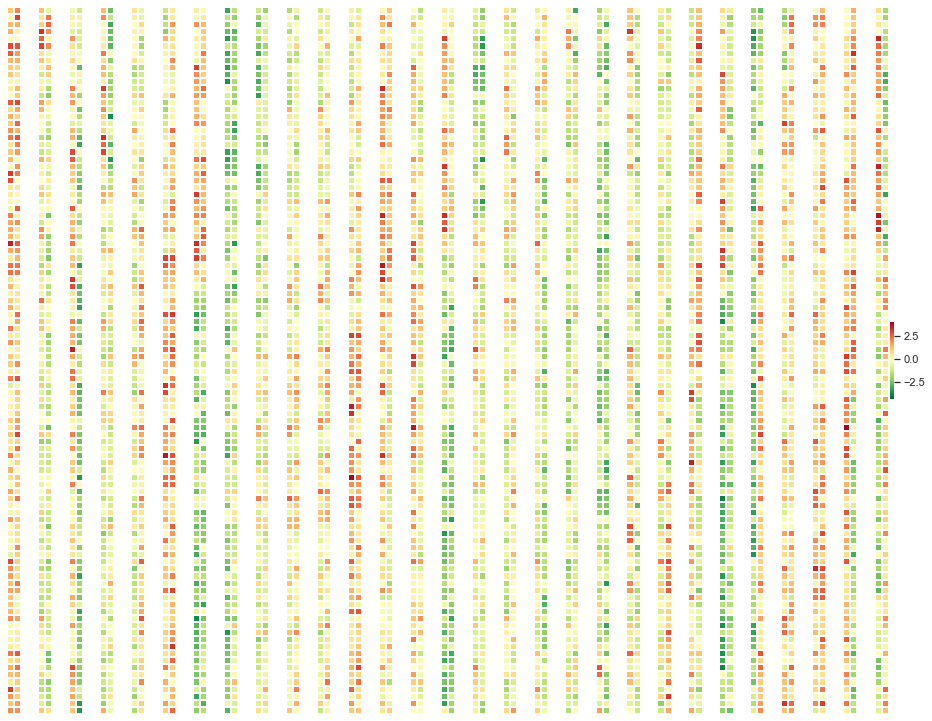

In [203]:
draw_pred_true_heatmap(0, 29)

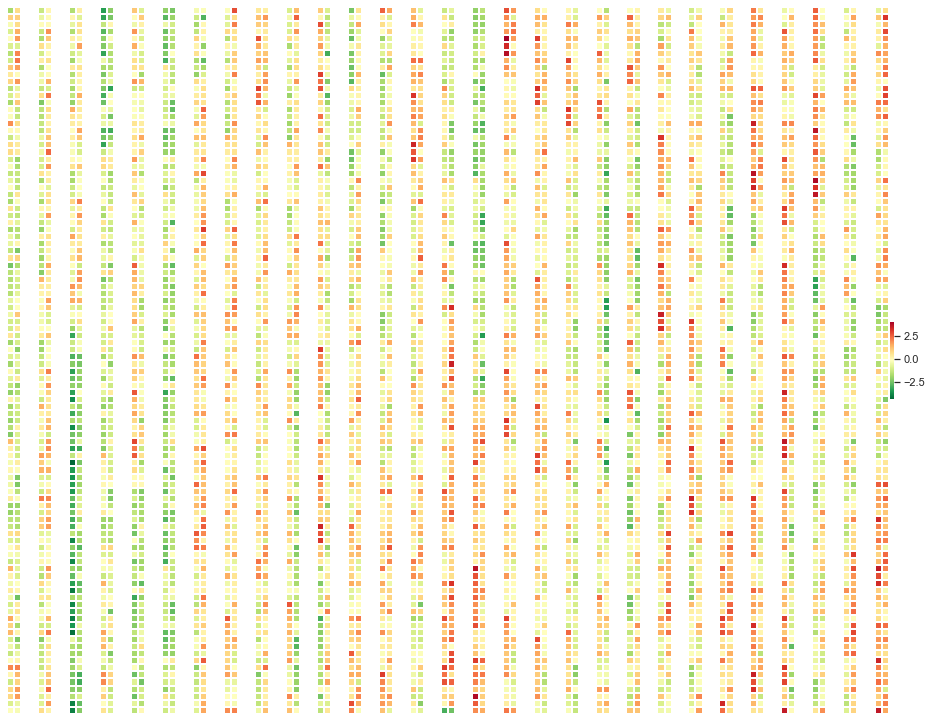

In [214]:
draw_pred_true_heatmap(29, 58)

In [217]:
pred_true_45_5_df = pd.read_csv('../predicting-satisfaction-using-graphs/csv/dataset/contrastive_45_5_epoch_10_result.csv', encoding='UTF-8', index_col=0)

In [218]:
pred_true_45_5_df

,prediction,label
0,-0.756355,0.85
1,-1.910322,0.15
2,-1.338922,-0.25
3,-0.558930,0.05
4,-0.871574,-0.85
...,...,...
295,-0.113928,0.30
296,2.650383,-0.20
297,-3.468285,0.25
298,-0.703973,-0.25


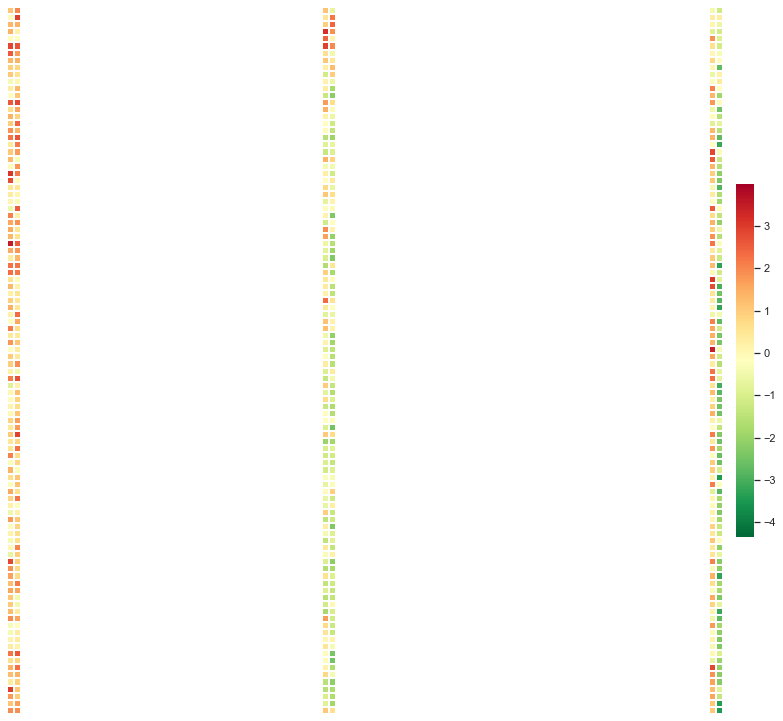

In [219]:
draw_pred_true_heatmap(0, 3)

In [348]:
pred_true_df.min()

prediction   -4.35361
label        -3.65000
dtype: float64

In [349]:
pred_true_df.max()

prediction    3.996099
label         3.400000
dtype: float64

In [350]:
cats, bins = pd.cut(pred_true_df.label.values, 10, retbins=True)

In [351]:
cats.describe()

,counts,freqs
categories,,
"(-3.657, -2.945]",68,0.011343
"(-2.945, -2.24]",259,0.043203
"(-2.24, -1.535]",610,0.101751
"(-1.535, -0.83]",887,0.147957
"(-0.83, -0.125]",1136,0.189491
"(-0.125, 0.58]",1194,0.199166
"(0.58, 1.285]",931,0.155296
"(1.285, 1.99]",571,0.095246
"(1.99, 2.695]",281,0.046872


In [352]:
bins

array([-3.65705, -2.945  , -2.24   , -1.535  , -0.83   , -0.125  ,
        0.58   ,  1.285  ,  1.99   ,  2.695  ,  3.4    ])

In [353]:
true_vals = pred_true_df.label.values
predictions = pred_true_df.prediction.values

In [354]:
def binning(bins, targets):
    bin_list = [0] * (len(pred_true_df))
    for i in range(len(targets)):
        for j in range(len(bins)-1):
            if targets[i] > bins[j] and targets[i] <= bins[j+1]:
                    bin_list[i] = j
                    break
    
    return bin_list

In [355]:
true_bin = binning(bins, true_vals)
pred_bin = binning(bins, predictions)

In [356]:
pred_true_df['pred_bin'] = pred_bin
pred_true_df['true_bin'] = true_bin

In [357]:
counts = pred_true_df.apply(pd.value_counts)

In [358]:
mini_df = pred_true_df[['pred_bin', 'true_bin']]

In [359]:
mini_df = mini_df.groupby(['pred_bin', 'true_bin']).size().reset_index().rename(columns={0:'count'})

In [360]:
table = mini_df.pivot('pred_bin', 'true_bin', 'count')

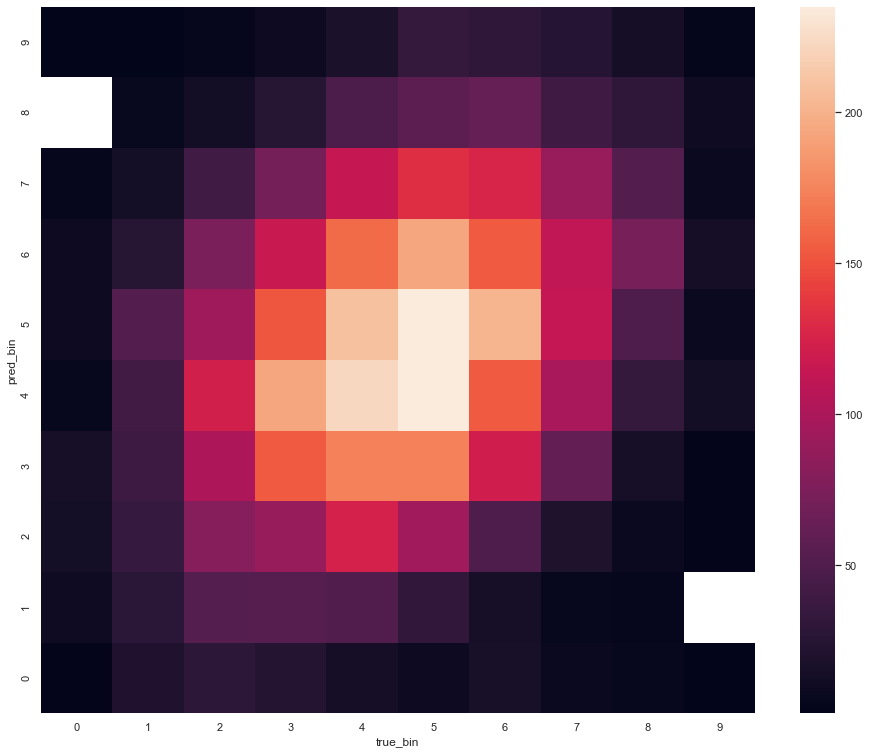

In [361]:
ax = sns.heatmap(table)
ax.invert_yaxis()
plt.show()